# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [43]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup 
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [48]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [51]:
# Get the page HTML
html = browser.html

# Create a BeautifulSoup object
mars_soup = soup(html, 'html.parser')

# Close the browser after scraping
browser.quit()

# Print the first 1000 characters of the HTML for verification
print(mars_soup.prettify()[:1000])

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

In [4]:
# Create a Beautiful Soup Object


In [55]:
# Display the extracted table data using Pandas
import pandas as pd

# Convert extracted data to a Pandas DataFrame
mars_df = pd.DataFrame(table_data[1:], columns=table_data[0])  # First row as headers

# Display the DataFrame
print(mars_df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [5]:
# Extract all rows of data


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [63]:
# Define column headers based on the expected structure
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Create an empty list to store the scraped data
mars_weather_data = []

# Loop through the table rows and extract data
for row in mars_table.find_all('tr')[1:]:  # Skip the header row
    columns_data = row.find_all('td')
    row_data = [column.get_text(strip=True) for column in columns_data]  # Extract text and clean whitespace
    
    # Debug: Print row data to check if it has 7 elements
    print(f"Extracted row data: {row_data} (Columns: {len(row_data)})")
    
    # Only append rows that have exactly 7 columns
    if len(row_data) == 7:
        mars_weather_data.append(row_data)

# Convert extracted data into a Pandas DataFrame
mars_weather_df = pd.DataFrame(mars_weather_data, columns=columns)


Extracted row data: ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'] (Columns: 7)
Extracted row data: ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'] (Columns: 7)
Extracted row data: ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'] (Columns: 7)
Extracted row data: ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'] (Columns: 7)
Extracted row data: ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'] (Columns: 7)
Extracted row data: ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'] (Columns: 7)
Extracted row data: ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'] (Columns: 7)
Extracted row data: ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'] (Columns: 7)
Extracted row data: ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'] (Columns: 7)
Extracted row data: ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'] (Columns: 7)
Extracted row data: ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'] (Columns: 7)
Extracte

In [6]:
# Create an empty list
# Loop through the scraped data to create a list of rows

In [71]:
for row in mars_table.find_all('tr'):
    columns_data = row.find_all('td')
    row_data = [column.get_text(strip=True) for column in columns_data]
    print(f"Extracted row data: {row_data}")  # Debugging output


Extracted row data: []
Extracted row data: ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
Extracted row data: ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
Extracted row data: ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
Extracted row data: ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
Extracted row data: ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
Extracted row data: ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
Extracted row data: ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
Extracted row data: ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
Extracted row data: ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
Extracted row data: ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
Extracted row data: ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
Extracted row data: ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
Extracted row data: ['145', '2012-08-31', '25', '1

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [77]:
# Confirm DataFrame was created successfully
print(mars_weather_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [8]:
# Confirm DataFrame was created successfully
print(mars_weather_df.head())

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [81]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [83]:
# Change data types for data analysis
# Convert data types where necessary
mars_weather_df["id"] = mars_weather_df["id"].astype(int)  # Convert id to integer
mars_weather_df["terrestrial_date"] = pd.to_datetime(mars_weather_df["terrestrial_date"])  # Convert to datetime
mars_weather_df["sol"] = mars_weather_df["sol"].astype(int)  # Convert sol to integer
mars_weather_df["ls"] = mars_weather_df["ls"].astype(int)  # Convert ls to integer
mars_weather_df["month"] = mars_weather_df["month"].astype(int)  # Convert month to integer
mars_weather_df["min_temp"] = mars_weather_df["min_temp"].astype(float)  # Convert min_temp to float
mars_weather_df["pressure"] = mars_weather_df["pressure"].astype(float)  # Convert pressure to float


In [85]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [89]:
# 1. How many months are there on Mars?
unique_months = mars_weather_df["month"].nunique()
print(unique_months)

12


In [91]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = mars_weather_df["sol"].nunique()
print(unique_sols)

1867


In [95]:
# 3. What is the average minimum temperature by month?
avg_temp_by_month = mars_weather_df.groupby("month")["min_temp"].mean().sort_values()
print(avg_temp_by_month)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


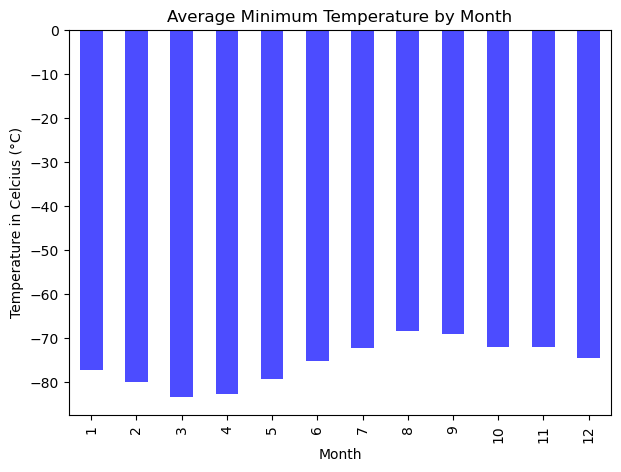

In [202]:
# Plot the average minimum temperature by month
# Calculate the average minimum temperature for each month
avg_temp_by_month = mars_weather_df.groupby("month")["min_temp"].mean()

    # Plot the average minimum temperature by Martian month
plt.figure(figsize=(7, 5))
avg_temp_by_month.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius (°C)")
plt.title("Average Minimum Temperature by Month")
#plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

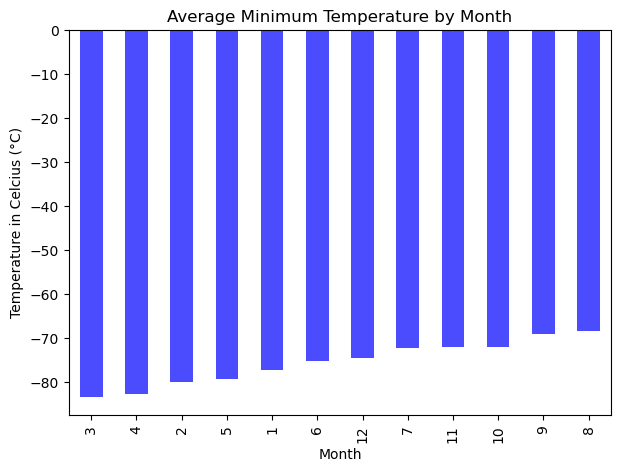

In [200]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Calculate the average minimum temperature for each month
avg_temp_by_month = mars_weather_df.groupby("month")["min_temp"].mean().sort_values()

    # Plot the average minimum temperature by Martian month
plt.figure(figsize=(7, 5))
avg_temp_by_month.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Temperature in Celcius (°C)")
plt.title("Average Minimum Temperature by Month")
#plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [147]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby("month")["pressure"].mean()

    # Display the results
print("Average Atmospheric Pressure by Martian Month:")
print(avg_pressure_by_month)

Average Atmospheric Pressure by Martian Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


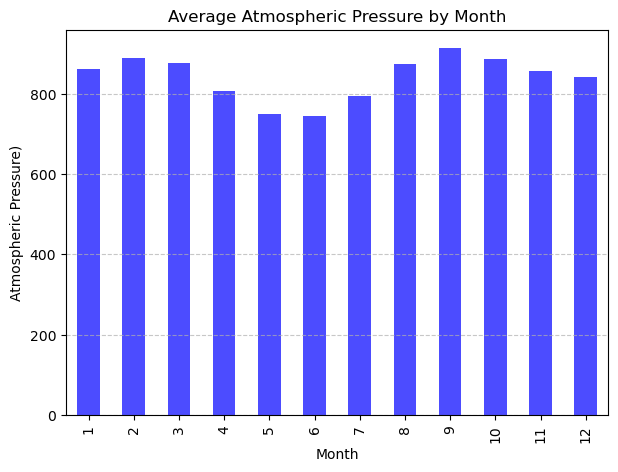

In [212]:
# Calculate the average atmospheric pressure by Martian month
avg_pressure_by_month = mars_weather_df.groupby("month")["pressure"].mean()

    # Plot the average atmospheric pressure by Martian month
plt.figure(figsize=(7, 5))
avg_pressure_by_month.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure)")
plt.title("Average Atmospheric Pressure by Month")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

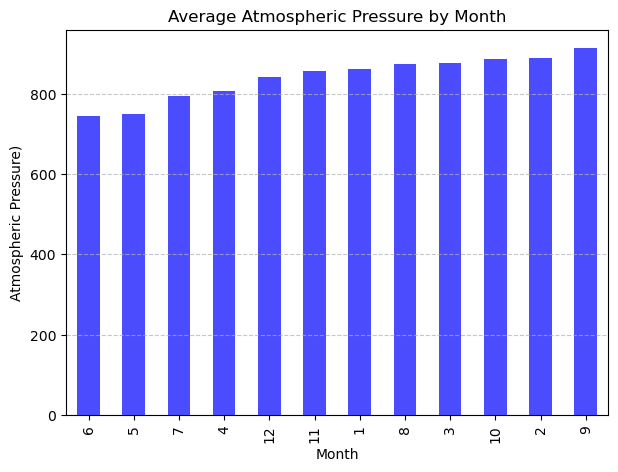

In [220]:
# Plot the average pressure by month
# Calculate the average atmospheric pressure by Martian month
avg_pressure_by_month = mars_weather_df.groupby("month")["pressure"].mean().sort_values()

    # Plot the average atmospheric pressure by Martian month
plt.figure(figsize=(7, 5))
avg_pressure_by_month.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure)")
plt.title("Average Atmospheric Pressure by Month")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

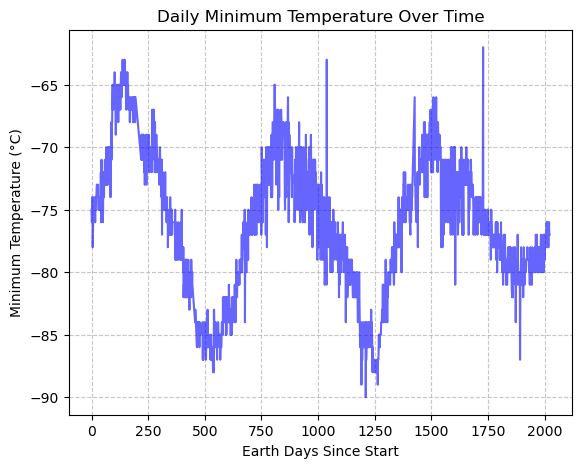

In [218]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Convert terrestrial_date to datetime if it's not already
mars_weather_df["terrestrial_date"] = pd.to_datetime(mars_weather_df["terrestrial_date"])

# Normalize the terrestrial_date column so that 2013 corresponds to 0 and subsequent dates increase
mars_weather_df["earth_days_since_start"] = (mars_weather_df["terrestrial_date"] - mars_weather_df["terrestrial_date"].min()).dt.days

# Plot daily minimum temperature over the normalized Earth days (0-1750+ days)
plt.figure(figsize=(6.5, 5))
plt.plot(mars_weather_df["earth_days_since_start"], mars_weather_df["min_temp"], alpha=0.6,color="blue")
plt.xlabel("Earth Days Since Start")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature Over Time")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### Minimum Temperature

The minimum temperature on Mars is a crucial metric that helps scientists understand the planet’s climate and atmospheric conditions. That being in Earth's August month being the lowest Average Tempeture month. And looking at the days since the start the minimum daily temperature over time is lowest at the 500th day and 1250th day. 

#### Atmospheric Pressure

The lowest atmostopheric temperature is July and the highest being September. During that time from the month of July being the lowest it then has a steady monthly increase until reaching the highest atmospheric temperature at September. Could be due to a season change on the planet. 

#### Year Length

Over time on Mars the Temperature has peaks ow lows and highs over a 2000 period range. More research needs to conducted to determine if it is due to the rotation of the planet, the orbit around the sun, or the tilt of the planet. There does seem to be a pattern in the temperature of the planet. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [222]:
# Write the data to a CSV
mars_weather_df.to_csv("mars_weather_data.csv", index=False)

In [22]:
browser.quit()